In [1]:
%pylab inline
from astroML.density_estimation import KDE, KNeighborsDensity
from astropy.io import fits
from density_tools import density_peaks

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def read_data(data):
    leo1 = fits.open(data)
    t = leo1[1].data
    ra_leo1 = t['ra']
    dec_leo1 = t['dec']
    return ra_leo1, dec_leo1

In [4]:
def NN_bayesian_density(x, y, NN, grid_size):
    """
    Function to compute the density of a distribution of particles using the K-Nearest Neighboors
    method from: http://www.astroml.org/modules/generated/astroML.density_estimation.KNeighborsDensity.html#astroML.density_estimation.KNeighborsDensity
    
    See Ivezic 10? for the details on how the algorithm works.
    
    Input:
    ------
    x : 1D numpy.array
        Array with the x-coordinates of the data.
    y : 1D numpy.array
        Array with the y-coordinates of the data.
    NN : int
        Number of neighboors to compute the desnity.
    grid_size : int
        Grid size in which the density is going to be evaluated.
        
    """
    assert len(x)==len(y), "Input data have different size"
    assert type(NN) == int, "NN should be of type int"
    assert type(grid_size) == int, "grid_zise should be of type int"
    
    # Grid parameters
    Nx = grid_size
    Ny = grid_size
    xmin, xmax = (min(x), max(x))
    ymin, ymax = (min(y), max(y))

    # Making a grid
    Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                                np.linspace(ymin, ymax, Ny)))).T
    # Putting data in 2d-array
    X = np.array([x, y]).T
    
    # Computing the density
    knn = KNeighborsDensity('bayesian', NN)
    dens_KNN = knn.fit(X).eval(Xgrid).reshape((Ny, Nx))
    
    return dens_KNN

    
    

In [5]:
sdss_data = ['draco.fits', 'leo1.fits', 'leo2.fits', 'segue.fits', 'willman1.fits']
mock_data = ['test_field.fits', 'test_field1.fits']



test_field.fits
['1$\\sigma$', '2$\\sigma$', '3$\\sigma$', '4$\\sigma$', '5$\\sigma$', '6$\\sigma$', '7$\\sigma$', '8$\\sigma$', '9$\\sigma$', '10$\\sigma$']
test_field1.fits


/usr/local/lib/python3.5/dist-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


['1$\\sigma$', '2$\\sigma$', '3$\\sigma$', '4$\\sigma$', '5$\\sigma$', '6$\\sigma$', '7$\\sigma$', '8$\\sigma$', '9$\\sigma$', '10$\\sigma$']


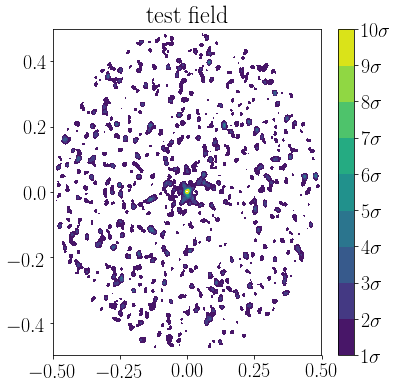

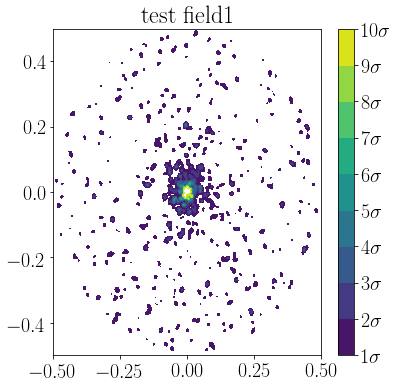

In [6]:
titles_mock = ['test\ field', 'test\ field1']
k=0
for name in mock_data:
    print(name)
    ra, dec = read_data('../data/mock_fields/'+name)
    dens_field = NN_bayesian_density(ra, dec, 20, 500)
    fig = density_peaks(dens_field, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    title(titles_mock[k])
    xlim(min(ra), max(ra))
    k+=1

draco.fits
leo1.fits
leo2.fits
segue.fits
willman1.fits


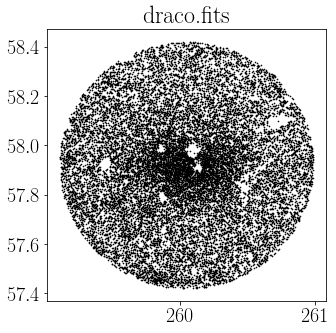

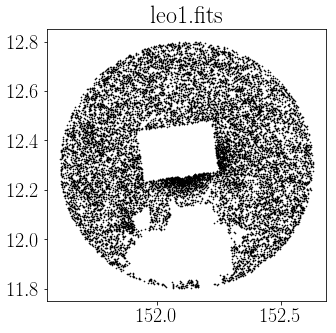

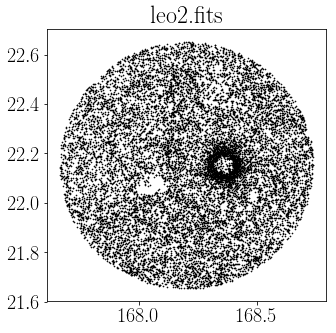

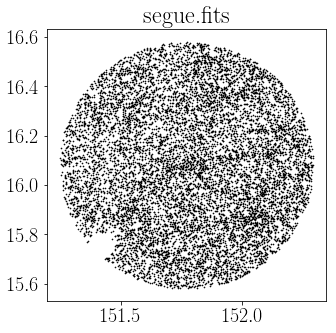

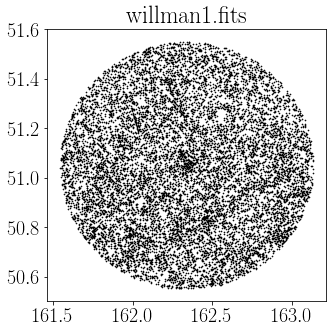

In [ ]:
for name in sdss_data:
    print(name)
    figure(figsize=(5,5))
    title('{}'.format(name))
    ra, dec = read_data('../data/sdss_fields/'+name)
    scatter(ra, dec, s=0.4, c='k')

In [ ]:
dwarf_names = ['draco', 'leo I', 'leo II', 'segue', 'Willman']
for name in sdss_data:
    print(name)
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field = NN_bayesian_density(ra, dec, 20, 500)
    density_peaks(dens_field, 5, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    xlabel('RA$^{\circ}$')
    ylabel('DEC$^{\circ}$')

draco.fits
['5$\\sigma$', '6$\\sigma$', '7$\\sigma$', '8$\\sigma$', '9$\\sigma$', '10$\\sigma$']
leo1.fits


/usr/local/lib/python3.5/dist-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


['5$\\sigma$', '6$\\sigma$', '7$\\sigma$', '8$\\sigma$', '9$\\sigma$', '10$\\sigma$']
leo2.fits
['5$\\sigma$', '6$\\sigma$', '7$\\sigma$', '8$\\sigma$', '9$\\sigma$', '10$\\sigma$']
segue.fits
